# Ford GoBike Exploration
## by Abhignya Chatarmal

## Investigation Overview

> The objective of the analysis is to see which passholder prefers which bike and in which month the most trip is taken. What is user behaviour.

## Dataset Overview

> I have extracted the LA city from Jan 2019 to Dec 2019. The structure of my data is (290309, 22)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
 la1=pd.read_csv("LA-q1.csv")
la2=pd.read_csv("LA-q2.csv")
la3=pd.read_csv("LA-q3.csv")
la4=pd.read_csv("LA-q4.csv")
station=pd.read_csv("stations.csv")


In [3]:
data=pd.concat([la1,la2,la3,la4])
data=data.rename(columns={'start_station':'Station_ID'})

In [4]:
data=data.merge(station,on='Station_ID')
data.drop(['start_lat','start_lon','end_lat','end_lon','Region '], axis=1, inplace= True)

In [5]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['start_year']= data['start_time'].dt.year
data['start_month']=data['start_time'].dt.month
data['start_day']=data['start_time'].dt.day

In [6]:
data['week_num'] = data['start_time'].apply(lambda time: time.dayofweek)
d = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['week_name'] = data['week_num'].map(d)

In [7]:
data['start_month'] = data['start_month'].apply(lambda x: calendar.month_abbr[x])

In [8]:
data['start_hour'] = data['start_time'].apply(lambda time: time.hour)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## AVERAGE TRIP DURATION BIKE TYPE



Text(0.5, 0, 'minutes [trip duration]')

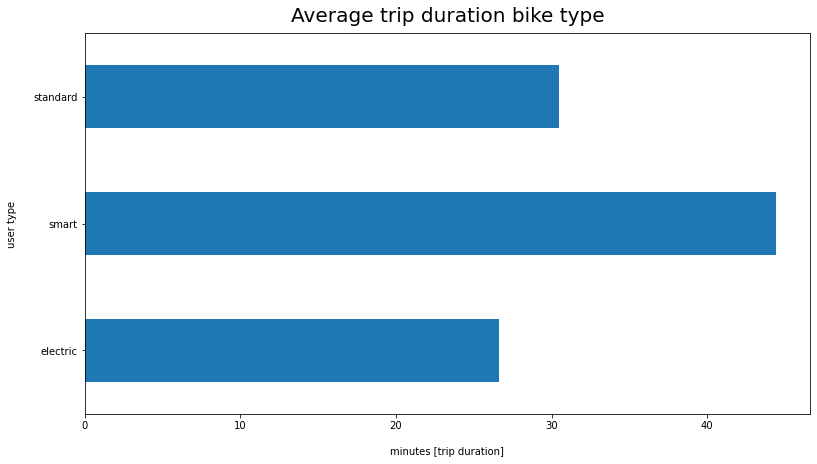

In [9]:
base_color = sb.color_palette()[0]
ax = data.groupby('bike_type')['duration'].mean().plot(kind='barh', color=base_color, figsize=(13,7))
ax.set_title('Average trip duration bike type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)

## HOUR DISTRIBUTION


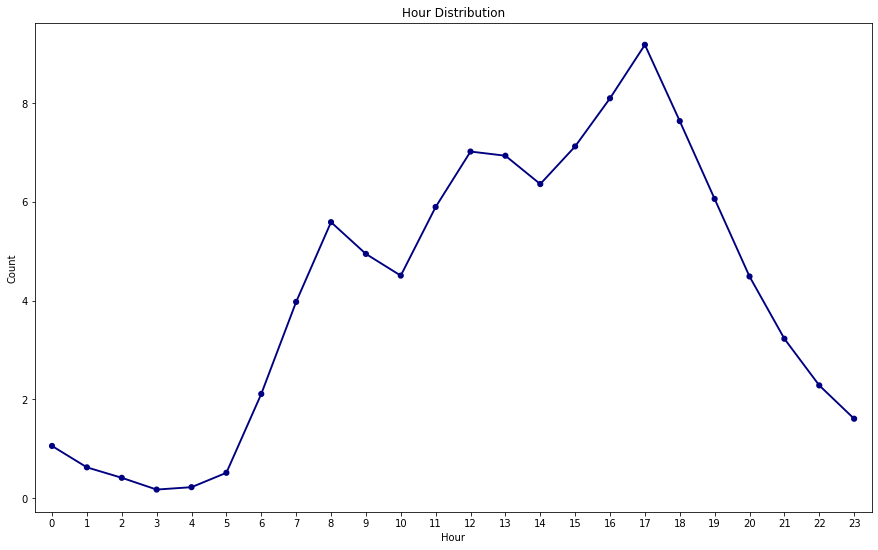

In [10]:
trip_by_hour_df = data.groupby('start_hour').agg({'bike_id':'count'}).reset_index()
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100
plt.figure(figsize=(15,9))
sb.pointplot(x='start_hour', y='bike_id', scale=.7, color='navy', data=trip_by_hour_df)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hour Distribution');

## ONE WAY VS ROUND TRIP

> To see which route category and during what time of day the most trip is taken

Text(0, 0.5, 'Count')

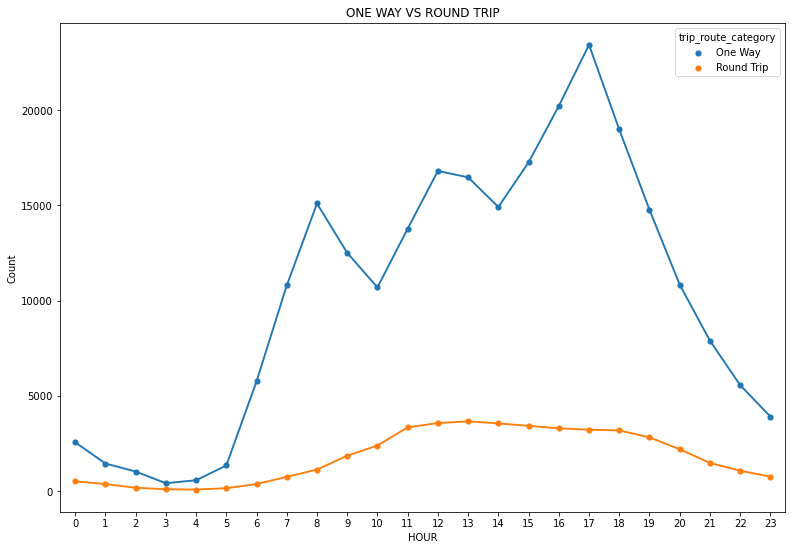

In [11]:
plt.figure(figsize=(13, 9))
user_week = data.groupby(['start_hour','trip_route_category']).size().reset_index()
sb.pointplot(data=user_week, x='start_hour', y=0, hue = 'trip_route_category', scale=.7, )
plt.title('ONE WAY VS ROUND TRIP')
plt.xlabel('HOUR')
plt.ylabel('Count')

## PASSHOLDERS BIKE PREFERENCE 
> Passholder pefers which bike on which weekday

Text(0.5, 1.03, 'Bike preference for passholders')

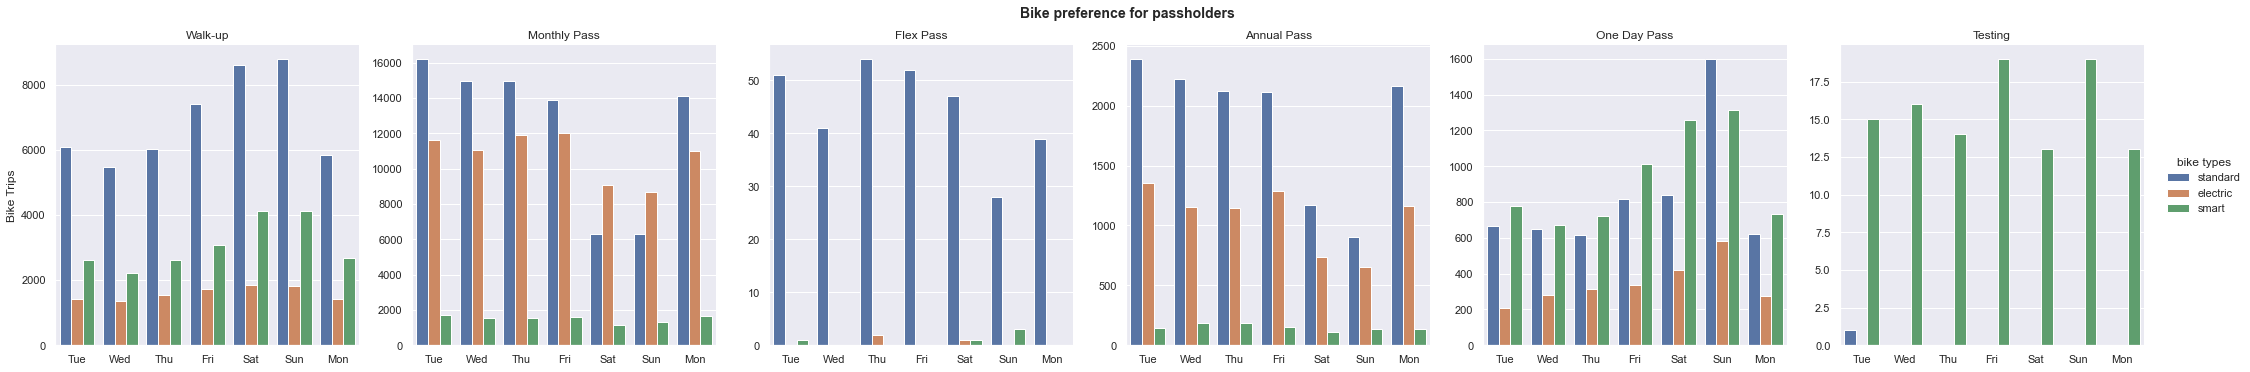

In [12]:
sb.set(rc={'figure.figsize':(12,12)})

g = sb.catplot(data=data, x='week_name', col="passholder_type", hue='bike_type', kind='count', sharey = False)
g.set_axis_labels("", "Bike Trips")
g._legend.set_title('bike types')
g.set_titles("{col_name}")
g.fig.suptitle('Bike preference for passholders', y=1.03, fontsize=14, fontweight='semibold')


## ROUTE PREFRENCE 

> Which bike is most prefered for the route preference- one way or round trip

Text(0.5, 1.03, 'Bike prefence with the route preference')

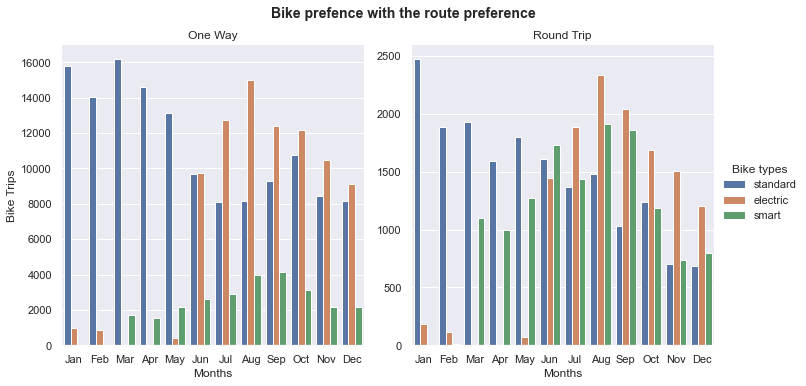

In [13]:
sb.set(rc={'figure.figsize':(12,12)})

g = sb.catplot(data=data, x='start_month', col="trip_route_category", hue='bike_type', kind='count', sharey = False)
g.set_axis_labels("Months", "Bike Trips")
g._legend.set_title('Bike types')
g.set_titles("{col_name}")
g.fig.suptitle('Bike prefence with the route preference', y=1.03, fontsize=14, fontweight='semibold')


## PLAN DURATION
> Which user plan duration prefer which bike on weekdays

Text(0.5, 1.03, 'PLAN DURATION WITH BIKE PREFERENCE')

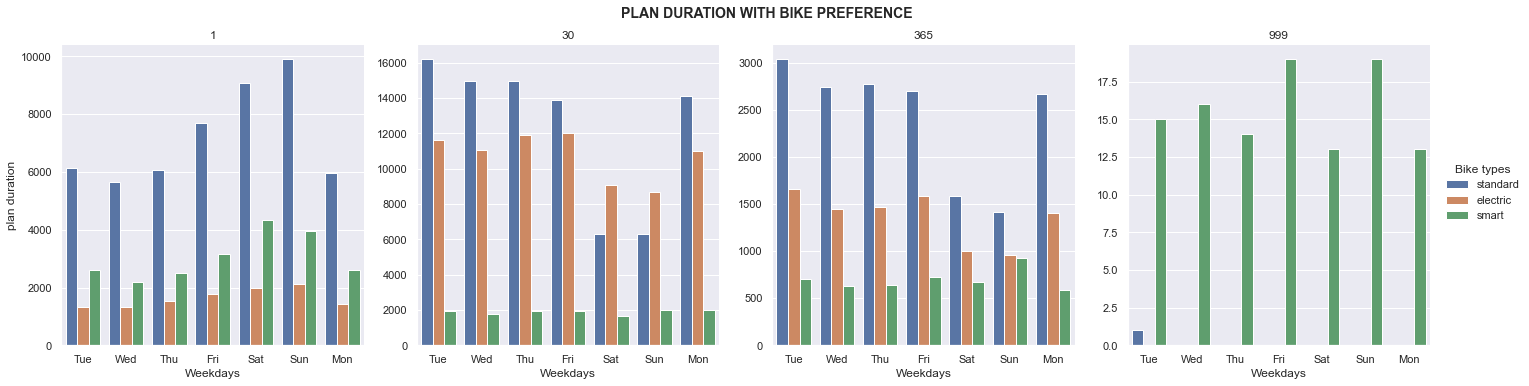

In [14]:
sb.set(rc={'figure.figsize':(12,12)})

g = sb.catplot(data=data, x='week_name', col="plan_duration", hue='bike_type', kind='count', sharey = False)
g.set_axis_labels("Weekdays", "plan duration")
g._legend.set_title('Bike types')
g.set_titles("{col_name}")
g.fig.suptitle('PLAN DURATION WITH BIKE PREFERENCE', y=1.03, fontsize=14, fontweight='semibold')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!